# Project 4, APS1070 Winter 2023
#### **Linear Regression -  15 points**
**Deadline: April 3rd, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Jiayi Bao
*   Your **student number**: 1004109868

### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 6])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858 

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the critical temperature of a superconductor, as described in the paper below:

*Hamidieh, Kam, A data-driven statistical model for predicting the critical temperature of a superconductor, Computational Materials Science, Volume 154, November 2018, Pages 346-354*

The following dataset contains 21263 instances, where each instance is a set of 81 features describing the superconductor's status. Our goal is to use these features to predict the `critical_temp` column, which is a setting that the design should take into account. We will make our predictions by implementing linear regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math


In [2]:

df=pd.read_csv("https://raw.githubusercontent.com/APS1070-W23/datasets/main/superconduct.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets. **[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [3]:
#Print the dataframe
df

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
print(df.shape)

(21263, 82)


In [5]:
X = df.drop(['critical_temp'], axis=1)
y = df['critical_temp']

#Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)


print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(17010, 81) (4253, 81)
(17010,) (4253,)


In [6]:
y_train = np.array(y_train).reshape(-1,1)
y_val = np.array(y_val).reshape(-1,1)
print(y_train.shape, y_val.shape)

(17010, 1) (4253, 1)


In [7]:
#Standardize the data
def standardize(df):
    mean = np.mean(df, axis=0)
    std = np.std(df, axis=0)
    
    # Subtract mean from each feature and divide by standard deviation
    df_std = (df - mean) / std
    
    return df_std

In [8]:
X_train_norm = standardize(X_train) #type: df
X_val_norm = standardize(X_val)  #type: df


In [9]:
#Insert a first column of all 1s in both the training and validation data sets
X_train_norm = np.hstack((np.ones((X_train_norm.shape[0],1)), X_train_norm)) #X_train_norm is np array now
X_val_norm = np.hstack((np.ones((X_val_norm.shape[0],1)), X_val_norm))  #X_val_norm is np array now
print(X_train_norm.shape, X_val_norm.shape)

(17010, 82) (4253, 82)


#### Explain why we should not insert the column of 1s prior to standardization:
__In order to ensure the meaning of the intercept term in the linear regression model, we should not insert the column of 1 before standardization. If we standardize the training and validation sets after inserting the column of 1s, it may result bias in the regression coefficients, as the intercept term  will be included in the standardization process. This can lead to misleading or incorrect interpretations of the coefficients and their magnitudes.__


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [10]:
### YOUR CODE HERE ###
iarr = np.dot(linalg.inv(np.dot(X_train_norm.T, X_train_norm)), np.dot(X_train_norm.T, y_train))
y_train_pred = np.dot(X_train_norm, iarr)
y_val_pred = np.dot(X_val_norm, iarr)

#calculate RMSE for both training and validation sets
rmse_train = np.sqrt(mean_squared_error(y_train_pred, y_train))
rmse_val = np.sqrt(mean_squared_error(y_val_pred, y_val))

print("RMSE for training set is",rmse_train)
print("RMSE for validation set is",rmse_val)

RMSE for training set is 17.495025140326373
RMSE for validation set is 17.848906385123207


## Part 3 - Full Batch Gradient Descent [3 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data. 

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges. 

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part. 

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [11]:
import time
start_time = time.time() ## Records current time

# create a 2D NumPy array with one row and 41 columns random numbers between 0 and 1
w = (np.random.random(82)/1000).reshape(1,-1) 

a = 0.01  #learning rate
# create a empty list for storing values in the loop
rmse_train_lst=[]
rmse_val_lst=[]

# iterate until model's validation RMSE converges
while True: 
    y_train_pred = np.dot(X_train_norm, w.T).reshape(-1,1)
    gradient = (1/len(y_train_pred) * np.dot(X_train_norm.T, y_train_pred - y_train)).reshape(1,-1)
    w = w - a * gradient # weight update
    y_val_pred = np.dot(X_val_norm, w.T).reshape(-1,1)
    #store the RMSE for training and validation sets in each iteration
    rmse_train_lst.append(np.sqrt(mean_squared_error(y_train_pred,y_train)))
    rmse_val_lst.append(np.sqrt(mean_squared_error(y_val_pred,y_val)))
    # gradient descent satisfies:
    if (rmse_val_lst[-1] <= 1.001*rmse_val):
        break
    
print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))
print("The number of epochs to convergence is ",len(rmse_train_lst))


--- Total Training Time: 114.02908158302307 (s) ---
The number of epochs to convergence is  97280


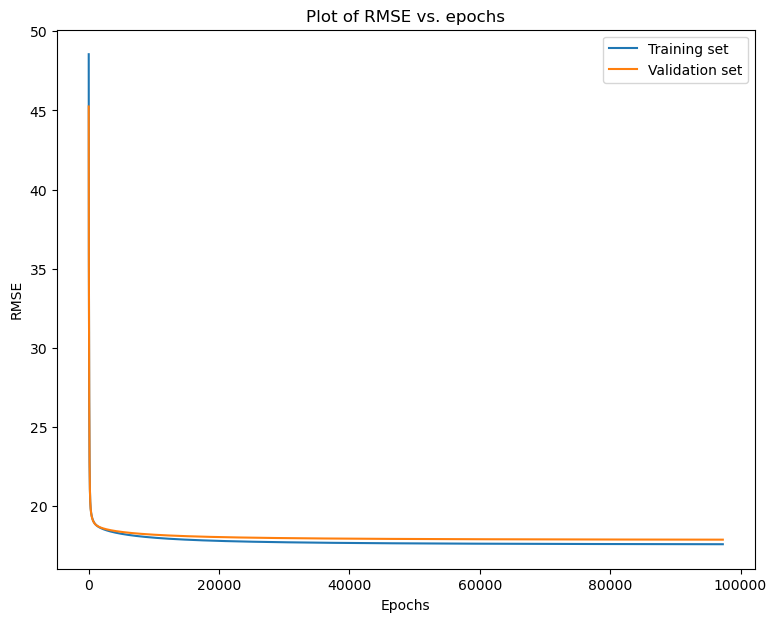

In [12]:
#Plot the training RMSE and the validation RMSE vs. epoch
plt.figure(figsize=(9,7))
plt.plot(rmse_train_lst, label = "Training set")
plt.plot(rmse_val_lst, label = "Validation set")
plt.title('Plot of RMSE vs. epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

#### Comment on overfitting/underfitting by observing the training and validation RMSE
__By observing the plot of training and validation RMSE, we can conclude that the model is underfitting as the number of epoch is really small, because the RMSE for both training and validation sets are really high and converge to a similar value. While as the number of epoch increases, the model is good fitting, because the training and validation RMSE are both low and converge to a similar value. Therefore, the model is neither overfitting nor underfitting at the convergence.__

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are: 
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays: 
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes: 
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged. 
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`. 

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [13]:
#Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached
def mini_batch(X_train, y_train, X_val, y_val, batch_size, a, CT):
    start_time = time.time()
    w = (np.random.random(X_train.shape[1])/1000).reshape(1,-1)
    rmse_tr_lst=[]  #create an empty list for storing RMSE of training set later
    rmse_val_lst=[] #create an empty list for storing RMSE of validation set later
    
    #Calculate the total number of batches required to iterate through the entire training set with the given batch size
    num_batches = math.ceil(X_train.shape[0] / batch_size)
    #X_train.shape[0]//batch_size + ((X_train.shape[0]%batch_size) > 0)
    
    time_lst = [] #create an empty list for storing the time from the start to the end of each epoch 
    epochs = 0
    
    while True:
        X_tr_batch_min = []
        y_tr_batch_min = []
        X_train = np.random.permutation(X_train)
        y_train = np.random.permutation(y_train)
        
        
        for i in range(0, X_train.shape[0], batch_size):
            X_tr_batch_min.append(X_train[i: i+batch_size])
            y_tr_batch_min.append(y_train[i: i+batch_size])
            
        if X_train.shape[0] % batch_size != 0:
            start_index = (X_train.shape[0] // batch_size) * batch_size
            X_tr_batch_min.append(X_train[start_index:])
            y_tr_batch_min.append(y_train[start_index:])

       
        for i in range(num_batches):
            y_train_pred = np.dot(X_tr_batch_min[i], w.T).reshape(-1,1)
            gradient = (1/len(y_train_pred) * np.dot(X_tr_batch_min[i].T, y_train_pred - y_tr_batch_min[i])).reshape(1,-1)
            w = w - a * gradient

        ##compute the predicted target variable values
        y_pred_train = np.dot(X_train, w.T).reshape(-1,1)
        y_pred_val = np.dot(X_val, w.T).reshape(-1,1)
       
        ##calculate RMSE
        rmse_tr_lst.append(np.sqrt(mean_squared_error(y_pred_train,y_train)))
        rmse_val_lst.append(np.sqrt(mean_squared_error(y_pred_val,y_val)))
        
        epochs += 1
        time_lst.append(time.time() - start_time)
        

        if(rmse_val_lst[-1] <= CT):
            break
        
        if epochs > 50:
            rmse_diff = np.diff(rmse_val_lst[-6:]) #compute the differences between the last six RMSE values
            
            # check if the model has converged for the last six epochs or the model has started overfitting and should be stopped
            if np.all(rmse_diff < 0) or rmse_val_lst[-1] > rmse_val_lst[0]:
                
                break
    
    return w, rmse_tr_lst, rmse_val_lst, time_lst
        

In [ ]:
 if(len(epochs_i)>1):
            fig, axs = plt.subplots(1, 2, figsize=(12, 5))
            axs[0].plot(rmse_train_i, label = "Training set")
            axs[1].plot(epochs_i, rmse_train_i, label = "Training set")
            axs[0].plot(rmse_val_i, label = "Validation set")
            axs[1].plot(epochs_i, rmse_val_i, label = "Validation et")
            axs[0].set(xlabel='Epoch', ylabel='RMSE')
            axs[1].set(xlabel='Epoch', ylabel='RMSE')
            axs[0].legend()
            axs[0].set_title('RMSE vs. Epochs for Training - Batch Size: ' + str(i))
            axs[1].legend()
            axs[1].set_title('RMSE vs. Epochs for Validation - Batch Size: ' + str(i))
            plt.show()

In [25]:
##create some empty lists
convergence = []
RMSE_tr_array = []
RMSE_val_array = []
epochs_time = []
size_time = []

##Set the batch sizes
batch_sizes = [2, 4, 8, 16, 24, 32, 40, 64, 128, 256, 512, 1024]

CT = 30 # convergence threshold 

training_time = []  # initialize list to store total training time for each batch size

for i in batch_sizes:
    
    w, rmse_train_i, rmse_val_i, epochs_i = mini_batch(X_train_norm, y_train, X_val_norm, y_val, i, 0.01, CT)
    ##set the condition if the model is converged
    converge = (rmse_val_i[-1] <= CT)
    RMSE_tr_array.append(rmse_train_i)
    RMSE_val_array.append(rmse_val_i)
    epochs_time.append(epochs_i)
    convergence.append(converge)

    if(converge == True):
        print("Converging batch size: ", i)
        
        size_time.append([i, epochs_i[-1], len(epochs_i)])

        
    else:
        print("Diverging batch size: ", i)
   
    # calculate and store total training time for each batch size
    total_time_i = i * epochs_i[-1]
    training_time.append(total_time_i)
    
df_size_time = pd.DataFrame(size_time, columns= ["Batch Size","Training time","Epochs"])
 

Converging batch size:  2
Converging batch size:  4
Converging batch size:  8
Converging batch size:  16
Diverging batch size:  24
Converging batch size:  32
Diverging batch size:  40
Diverging batch size:  64
Diverging batch size:  128
Diverging batch size:  256
Diverging batch size:  512
Diverging batch size:  1024


In [26]:
df_size_time

,Batch Size,Training time,Epochs
0,2,0.255317,4
1,4,0.107713,3
2,8,0.151595,7
3,16,0.154587,10
4,32,0.114694,10


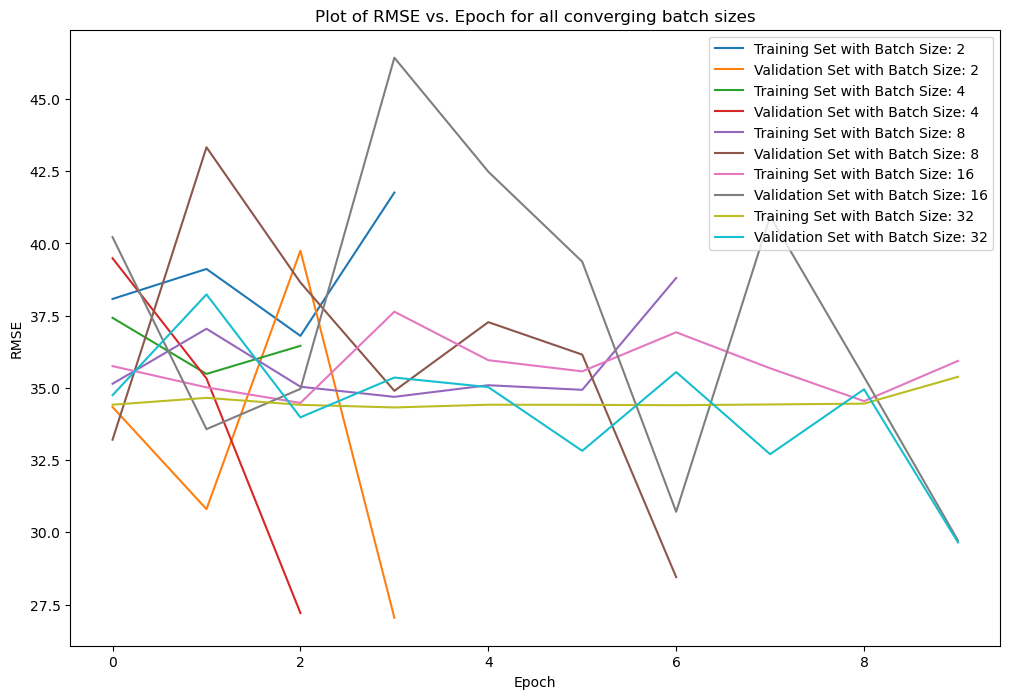

In [27]:
# Plot training and validation RMSE vs. epoch for all the converging batch sizes
plt.figure(figsize=(12,8))
for i in range(len(convergence)):
    if(convergence[i]==True):
        plt.plot(RMSE_tr_array[i], label='Training Set with Batch Size: '+str(batch_sizes[i]))
        plt.plot(RMSE_val_array[i], label ='Validation Set with Batch Size: '+str(batch_sizes[i]))
plt.title('Plot of RMSE vs. Epoch for all converging batch sizes')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

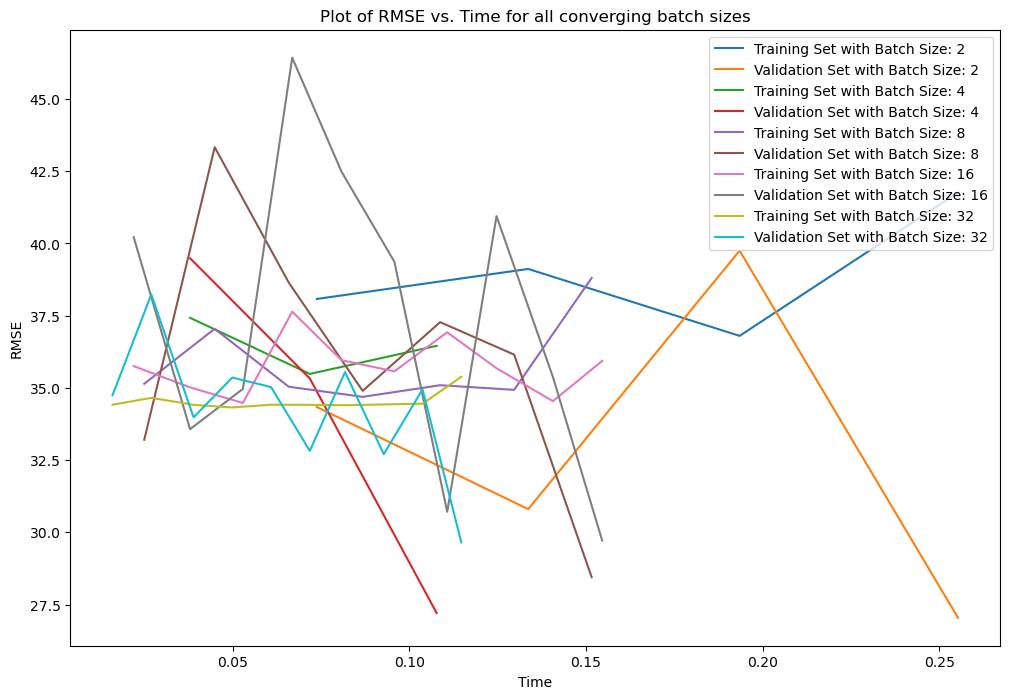

In [28]:
#Plot training and validation RMSE vs. time for all the converging batch sizes
plt.figure(figsize=(12,8))
for i in range(len(convergence)):
    if(convergence[i]==True):
        plt.plot(epochs_time[i], RMSE_tr_array[i], label='Training Set with Batch Size: '+str(batch_sizes[i]))
        plt.plot(epochs_time[i], RMSE_val_array[i], label ='Validation Set with Batch Size: '+str(batch_sizes[i]))
plt.title('Plot of RMSE vs. Time for all converging batch sizes')
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.legend()
plt.show()


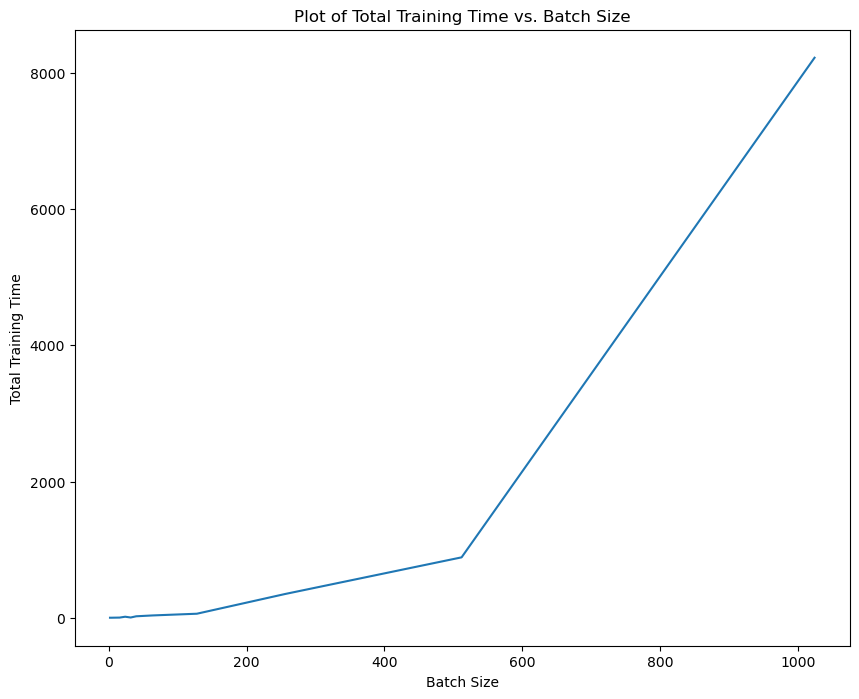

In [29]:
#Plot Total training time (y-axis) vs. Batch size (x-axis)
plt.figure(figsize=(10,8))
plt.title('Plot of Total Training Time vs. Batch Size')
plt.plot(batch_sizes, training_time) 
plt.xlabel('Batch Size')
plt.ylabel('Total Training Time')
plt.show()



#### Describe your findings, including the main takeaways from each of your plots
- We sweep different values for the mini-batch size, including 2, 4, 8, 16, 24, 32, 40, 64, 128, 256, 512, 1024, for checking the condition of convergence and divergence. We found that the results of each run may vary due to some random factors, but the model always be converged when the mini-batch size in the range of 2 to 40.  
- For the plot of RMSE vs. Epoch for all converging batch sizes, we found that the model iterates fewer epochs when the batch size is small(e.g. 2, 4), and the model interates more epochs when the batch size is large (e.g. 16, 32). When the batch size is 2 or 4, the model has relatively better performence.  
- For the plot of RMSE vs. training time for all converging batch sizes, we found that it takes longest time for converging when the batch size is 2. While for the rest of batch sizes, the model always takes longer time to be converged when the batch size is relatively large(e.g. 16), and takes shorter time when the batch size is relatively small (e.g. 4, 8). The model has relatively better performance when the batch size is 4.  
- For the plot of training time vs. batch size, we found that the model becomes converged faster as the batch size is relatively small (batch size smaller than 200). and the model converges slower as the batch size is relatively big. In particular, the total training time increases largely as the batch size larger than 500.  
- From the table of df_size_time, we could see the model has the fastest convergence time when the batch size is 4, which has the lowst training time and time epochs.



## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. 
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [22]:
#Step 1
learning_rates = [0.0001, 0.0005, 0.0009, 0.001, 0.005, 0.009, 0.02, 0.03, 0.04, 0.05, 0.07, 0.09]
batch_sizes = [64, 128, 256]
results = [] # create a empty list for storing the result values for each iteration
CT=30

for i in batch_sizes:
    print("Batch Size: ", i)
    
    for a in learning_rates: 
        w, rmse_train_i, rmse_val_i, epochs_i = mini_batch(X_train_norm, y_train, X_val_norm, y_val, i, a, CT)
    
        ##check if the model is converged
        converge = (rmse_val_i[-1] <= CT)
        
        if(converge==True):
            print("Convergence for Learning Rate is ", a,
                  " training time required:", epochs_i[-1],
                  " time epochs:",len(epochs_i))

            results.append([i, a, rmse_train_i[-1], rmse_val_i[-1]])
            break

        else:
            print("Divergence for Learning Rate: ", a)

results_df = pd.DataFrame(results, columns = ["Batch Size","Learning Rate","Training RMSE", "Validation RMSE"])

Batch Size:  64
Divergence for Learning Rate:  0.0001
Divergence for Learning Rate:  0.0005
Divergence for Learning Rate:  0.0009
Divergence for Learning Rate:  0.001
Divergence for Learning Rate:  0.005
Divergence for Learning Rate:  0.009
Convergence for Learning Rate is  0.02  training time required: 0.013963937759399414  time epochs: 1
Batch Size:  128
Divergence for Learning Rate:  0.0001
Divergence for Learning Rate:  0.0005
Divergence for Learning Rate:  0.0009
Divergence for Learning Rate:  0.001
Divergence for Learning Rate:  0.005
Divergence for Learning Rate:  0.009
Divergence for Learning Rate:  0.02
Divergence for Learning Rate:  0.03
Convergence for Learning Rate is  0.04  training time required: 0.09474802017211914  time epochs: 11
Batch Size:  256
Divergence for Learning Rate:  0.0001
Divergence for Learning Rate:  0.0005
Divergence for Learning Rate:  0.0009
Divergence for Learning Rate:  0.001
Divergence for Learning Rate:  0.005
Divergence for Learning Rate:  0.009
D

In [23]:
#Report batch size, learning rate, and training and validation RMSE
results_df

,Batch Size,Learning Rate,Training RMSE,Validation RMSE
0,64,0.02,35.399687,29.291627
1,128,0.04,35.607143,29.176047
2,256,0.03,35.900872,28.441270


In [30]:
#Results of part 4
df_size_time

,Batch Size,Training time,Epochs
0,2,0.255317,4
1,4,0.107713,3
2,8,0.151595,7
3,16,0.154587,10
4,32,0.114694,10


__From above table, we could see that the model has the fastest convergence time when the batch size is 4, which has the lowst training time and time epochs.__

In [36]:
learning_rates = [0.001, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 0.013, 0.015, 0.017, 0.019, 0.02]
best_batch_size = 4
RMSE_train_array = []
RMSE_valid_array = []
EPOCHS_time = []
CONVERGENCE = []
results_1 = []

for a in learning_rates:
    
    w, rmse_train_i, rmse_val_i, epochs_i = mini_batch(X_train_norm, y_train, X_val_norm, y_val, best_batch_size, a, CT)
    ##set the condition if the model is converged
    converge = (rmse_val_i[-1] <= CT)
    RMSE_train_array.append(rmse_train_i)
    RMSE_valid_array.append(rmse_val_i)
    EPOCHS_time.append(epochs_i)
    CONVERGENCE.append(converge)
    results_1.append([a, epochs_i[-1], len(epochs_i), rmse_train_i[-1], rmse_val_i[-1]])

    if(converge == True):
        print("Convergence as Learning rate: ", a)

results_1_df = pd.DataFrame(results_1, columns=["Learning Rate", "Training time", "Epochs","Training RMSE", "Validation RMSE"])

Convergence as Learning rate:  0.005
Convergence as Learning rate:  0.006
Convergence as Learning rate:  0.007
Convergence as Learning rate:  0.008
Convergence as Learning rate:  0.009
Convergence as Learning rate:  0.01
Convergence as Learning rate:  0.013
Convergence as Learning rate:  0.015
Convergence as Learning rate:  0.017
Convergence as Learning rate:  0.019
Convergence as Learning rate:  0.02


In [37]:
#Results table for the batch size 4
results_1_df

,Learning Rate,Training time,Epochs,Training RMSE,Validation RMSE
0,0.001,1.858030,53,34.463180,36.012503
1,0.005,1.430176,41,35.613478,29.265848
2,0.006,0.498668,14,35.856710,29.379733
3,0.007,0.742016,21,36.547761,28.198329
4,0.008,0.280251,8,36.777587,28.906794
5,0.009,0.038896,1,38.533139,26.222172
6,0.010,0.072806,2,36.695445,27.037140
7,0.013,0.279253,8,43.153200,28.443961
8,0.015,0.141622,4,38.242998,29.396137
9,0.017,0.212432,6,40.506070,29.190094


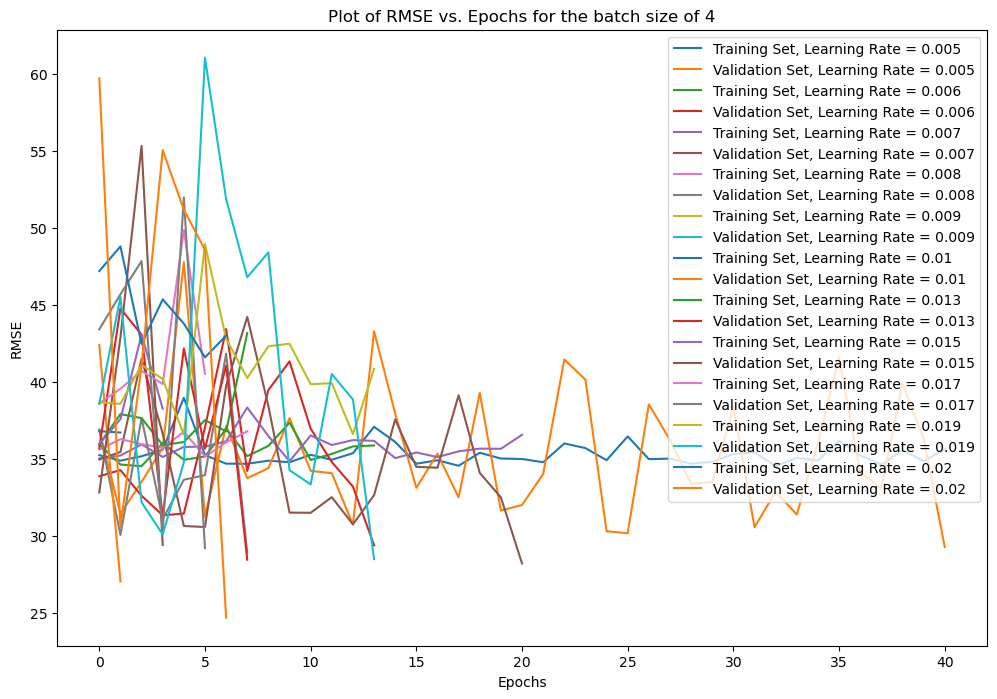

In [44]:
#Plot the training and validation RMSE vs. epoch
learning_rates = [0.001, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 0.013, 0.015, 0.017, 0.019, 0.02]
plt.figure(figsize=(12,8))
for i in range(len(CONVERGENCE)):
    if(CONVERGENCE[i]==True):
        plt.plot(RMSE_train_array[i], label='Training Set, Learning Rate = '+str(learning_rates[i]))
        plt.plot(RMSE_valid_array[i], label ='Validation Set, Learning Rate = '+str(learning_rates[i]))
plt.title('Plot of RMSE vs. Epochs for the batch size of 4')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

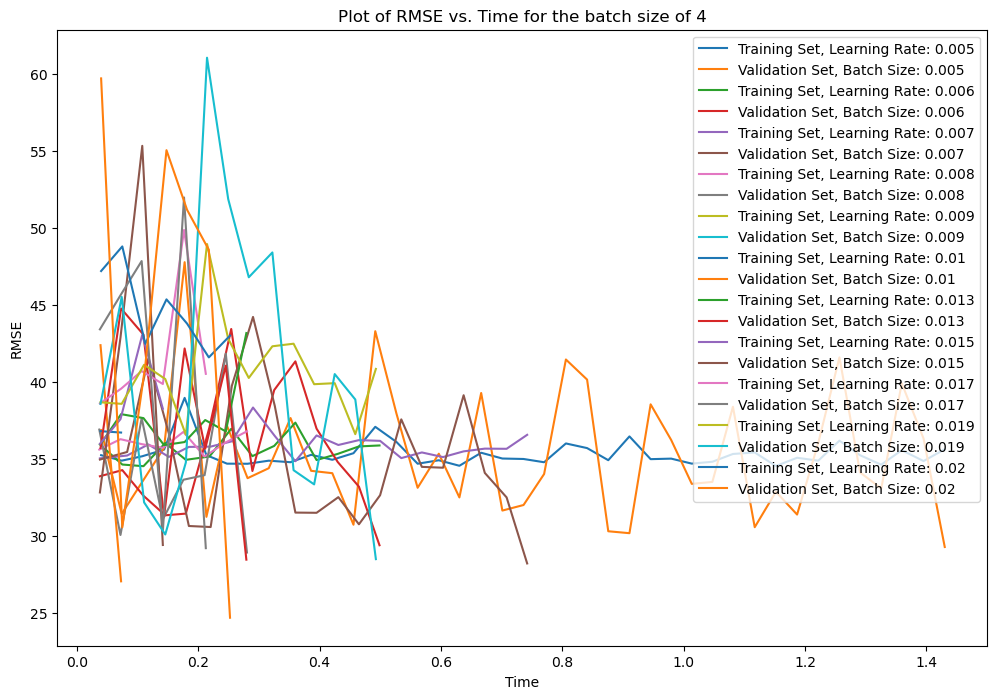

In [46]:
#Plot the training and validation RMSE vs. time 
plt.figure(figsize=(12,8))
for i in range(len(CONVERGENCE)):
    if(CONVERGENCE[i]==True):
        plt.plot(EPOCHS_time[i], RMSE_train_array[i], label='Training Set, Learning Rate: '+str(learning_rates[i]))
        plt.plot(EPOCHS_time[i], RMSE_valid_array[i], label ='Validation Set, Batch Size: '+str(learning_rates[i]))
plt.title('Plot of RMSE vs. Time for the batch size of 4')
plt.xlabel('Time')
plt.ylabel('RMSE')
plt.legend()
plt.show()


#### Describe your findings, including the main takeaways from each of your plots\
- Based on the results of part 4, we got that the model has the fastest convergence time when the batch size is 4, which has the lowst training time and time epochs. We tried to sweep the learning rates(0.001, 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 0.013, 0.015, 0.017, 0.019, 0.02) while applying Mini-batch GD, and we got the model convergence as the learning rate equals to 0.005, 0.006, 0.007, 0.008, 0.009, 0.010, 0.013, 0.015, 0.017, 0.019, 0.02.  
- From the results table df_results_1, we could see that as the learning rate equals to  0.009, the model needs the lowest training time and time epochs to be converged.  
- From the plot of RMSE vs. Epochs for the batch size of 4, we could see that the model needs more epochs to converge as the learning rate is less than 0.008, and the model needs less epochs time to converge as the learning rate in the range of 0.009 to 0.019.  
- From the plot of RMSE vs. Time for the batch size of 4, we could see the similar results as we found in the plot of RMSE vs. Epochs.

## Part 6 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 5. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac: 
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/ODb_vtN2 to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS-1070-W23/project-4-*********
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**

 
 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS-1070-W23/project-4-*********
```

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-4-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions. 

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded. 

 8. To submit your work, follow: 
```
cd <your assignment folder>
git add W23_Project_4_git.ipynb
git commit -m “Final Submission”
git push 
```
If you have any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or 
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**

###  My assignment repository in GitHub
https://github.com/APS1070-W23/project-4-JIAYI-BAO